In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from datetime import datetime

In [34]:
df2 = pd.read_csv("fcc-forum-pageviews.csv")

date_list = []
month = []
year = []

# I convert the date from str to datetime format
for idx,date in enumerate (df2["date"]):
    date_list.append ( datetime.strptime(df2.loc[idx,"date"], "%Y-%m-%d") )
    month.append(date_list[idx].month)
    year.append(date_list[idx].year)

# Two columns are added to de df    
df["month"] = month
df["year"] = year
df.head()

,value,month,year
date,,,
2016-05-09,1201,5,2016
2016-05-10,2329,5,2016
2016-05-11,1716,5,2016
2016-05-12,10539,5,2016
2016-05-13,6933,5,2016


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset. **OKAY**

In [35]:
# max_visits = df["value"].max()
# min_visits = df["value"].min()
# print(max_visits, min_visits)
df2 = df [ (df["value"] > (np.percentile(df["value"], 2.5))) & (df["value"] < (np.percentile(df["value"], 97.5))) ]

Create a **draw_line_plot function** that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

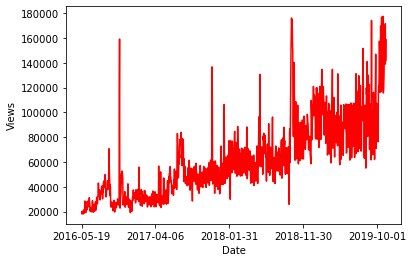

In [36]:
def draw_line_plot(x_val, y_val):
    fig, ax = plt.subplots(1)  
    ax.plot(x_val, y_val, "r")
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_xlabel("Date")
    ax.set_ylabel("Views")
    plt.show()
    return

draw_line_plot(df2.index, df2["value"])

#¡¡¡¡¡¡¡¡¡¡¡¡¡ FALTA MEJORAR LOS TICKS DEL EJE X !!!!!!!!!

Create a **draw_bar_plot function** that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views. **OKAY!!**

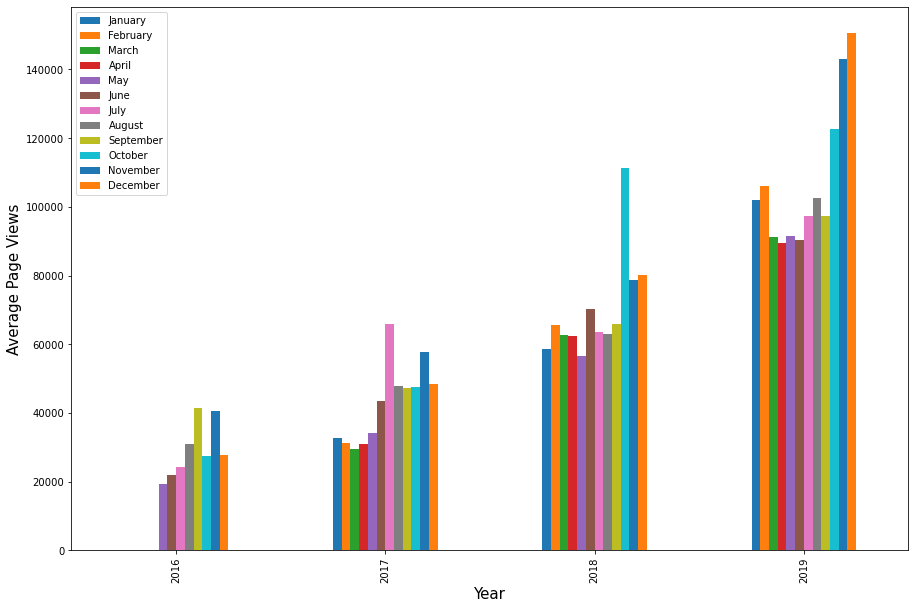

In [282]:
def draw_bar_plot_function(data_frame):
    df_new = data_frame.groupby(["year", "month"])["value"].mean()
    plot_legends = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December']
    df_new2 = df_new.unstack()
    df_new2.columns = plot_legends
    df_new2.plot(kind = "bar", stacked = False, figsize = (15,10));
    plt.xlabel("Year", fontsize = 15);
    plt.ylabel("Average Page Views", fontsize=15)
    return

draw_bar_plot_function(df2)

In [213]:
# Bueno, todo lo de esta celda se evitó utilizando
# La funcion gruopuby y la funcion unstack().plot()## (VER CELDA DE ARRIBA)
# First we need to calculate the average daily page wiev per month

average_daily_views = []
views_month = 0
days = 0
prev_month = df2.iloc[0,1]
prev_year = df2.iloc[0,2]

for i in range(len(df2["value"])):  
    if (df2.iloc[i,1] == prev_month) & (i+1 != len(df2["value"])):
        #same month and if we're not in the last row
        views_month += df2.iloc[i,0]
        days += 1
        prev_month = df2.iloc[i,1]
        prev_year = df2.iloc[i,2]
                
    elif (df2.iloc[i,1] != prev_month): #Everytime month changes
        average_daily_views.append(views_month/days)
        
        views_months = df2.iloc[i,0]
        prev_month = df2.iloc[i,1]
        prev_year = df2.iloc[i,2]        
        days = 1 

    elif (i+1 == len(df2["value"])): # Special case for the last row
        views_month += df2.iloc[i,0]
        days += 1
        average_daily_views.append(views_month/days)
        


        

Create a **draw_box_plot function** that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.